## Exploratory Data Analysis

Import all necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1. Load dataset and display n samples

In [2]:
# Utility method to load data from a file (csv, excel, text file as table)
def load_data(fpath, ftype='csv'):

    if ftype == 'excel':
        data = pd.read_excel(fpath)
    elif ftype == 'text':
        data = pd.read_table(fpath)
    else:
        data = pd.read_csv(fpath)

    return data

In [3]:
# Load dataset
data_path = ''
train_data = load_data(fpath = data_path + 'Train.csv', ftype = 'csv')
train_data.sample(5)

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
3544,ID_8YKI5BBZPJ3K,Vaishali,Chehrakala,22,22,WetTillagePuddling FourWheelTracRotavator Trac...,2022-07-15,4,Manual_PuddledRandom,2022-07-25,...,hand,2022-10-30,3000.0,2022-11-04,machine,26,10,plowed_in_soil,0.727273,960
83,ID_6TQRY8Y8VQMP,Nalanda,Rajgir,8,8,TractorPlough FourWheelTracRotavator,2022-06-29,4,Manual_PuddledRandom,2022-06-14,...,hand,2022-12-06,250.0,2022-12-22,hand,12,10,plowed_in_soil,0.250000,300
1843,ID_1LL2UOOMUHU0,Gaya,Wazirganj,15,15,WetTillagePuddling FourWheelTracRotavator,2022-07-20,4,Manual_PuddledRandom,2022-06-30,...,hand,2022-10-30,100.0,2022-11-19,machine,30,10,plowed_in_soil,0.148148,300
3146,ID_6WDK5VEP5XPM,Nalanda,Noorsarai,30,30,TractorPlough WetTillagePuddling,2022-07-20,3,Manual_PuddledRandom,2022-06-22,...,hand,2022-11-15,90.0,2023-01-20,machine,26,10,plowed_in_soil,0.250000,400
3847,ID_E1N1SF21ISDM,Jamui,Khaira,10,10,TractorPlough,2022-07-02,4,Manual_PuddledRandom,2022-07-09,...,hand,2022-12-08,200.0,2022-12-09,hand,25,10,plowed_in_soil,0.136364,300


#### 2. List all features from dataset

In [4]:
# get features
features = train_data.columns.values
print("Feature List: ", features)

Feature List:  ['ID' 'District' 'Block' 'CultLand' 'CropCultLand' 'LandPreparationMethod'
 'CropTillageDate' 'CropTillageDepth' 'CropEstMethod' 'RcNursEstDate'
 'SeedingSowingTransplanting' 'SeedlingsPerPit' 'NursDetFactor'
 'TransDetFactor' 'TransplantingIrrigationHours'
 'TransplantingIrrigationSource' 'TransplantingIrrigationPowerSource'
 'TransIrriCost' 'StandingWater' 'OrgFertilizers' 'Ganaura' 'CropOrgFYM'
 'PCropSolidOrgFertAppMethod' 'NoFertilizerAppln' 'CropbasalFerts'
 'BasalDAP' 'BasalUrea' 'MineralFertAppMethod' 'FirstTopDressFert'
 '1tdUrea' '1appDaysUrea' '2tdUrea' '2appDaysUrea'
 'MineralFertAppMethod.1' 'Harv_method' 'Harv_date' 'Harv_hand_rent'
 'Threshing_date' 'Threshing_method' 'Residue_length' 'Residue_perc'
 'Stubble_use' 'Acre' 'Yield']


#### 3. Display attribute info and differenciate categorical & continuous features

In [5]:
# display info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   District                            3870 non-null   object 
 2   Block                               3870 non-null   object 
 3   CultLand                            3870 non-null   int64  
 4   CropCultLand                        3870 non-null   int64  
 5   LandPreparationMethod               3870 non-null   object 
 6   CropTillageDate                     3870 non-null   object 
 7   CropTillageDepth                    3870 non-null   int64  
 8   CropEstMethod                       3870 non-null   object 
 9   RcNursEstDate                       3787 non-null   object 
 10  SeedingSowingTransplanting          3870 non-null   object 
 11  SeedlingsPerPit                     3581 no

In [6]:
# find the type of features

# utility method to get categorial featutes
def get_categorical_features(features, data):

    categorical_features = []
    for feature in features:
        if data[feature].dtype == 'object':
            categorical_features.append(feature)
    return categorical_features

# utility method to get continuous featutes
def get_continuous_features(features, data):

    continuous_features = []
    for feature in features:
        if data[feature].dtype == 'int64' or data[feature].dtype == 'float64':
            continuous_features.append(feature)
    
    return continuous_features

In [7]:
cat_features = get_categorical_features(features, train_data)
con_features = get_continuous_features(features, train_data)

print("Categorical Features: ", cat_features)
print("Continuous Features: ", con_features)

print("No. of Features: ", len(features))
print("No. of Categorical Features: ", len(cat_features))
print("No. of Continuous Features: ", len(con_features))

Categorical Features:  ['ID', 'District', 'Block', 'LandPreparationMethod', 'CropTillageDate', 'CropEstMethod', 'RcNursEstDate', 'SeedingSowingTransplanting', 'NursDetFactor', 'TransDetFactor', 'TransplantingIrrigationSource', 'TransplantingIrrigationPowerSource', 'OrgFertilizers', 'PCropSolidOrgFertAppMethod', 'CropbasalFerts', 'MineralFertAppMethod', 'FirstTopDressFert', 'MineralFertAppMethod.1', 'Harv_method', 'Harv_date', 'Threshing_date', 'Threshing_method', 'Stubble_use']
Continuous Features:  ['CultLand', 'CropCultLand', 'CropTillageDepth', 'SeedlingsPerPit', 'TransplantingIrrigationHours', 'TransIrriCost', 'StandingWater', 'Ganaura', 'CropOrgFYM', 'NoFertilizerAppln', 'BasalDAP', 'BasalUrea', '1tdUrea', '1appDaysUrea', '2tdUrea', '2appDaysUrea', 'Harv_hand_rent', 'Residue_length', 'Residue_perc', 'Acre', 'Yield']
No. of Features:  44
No. of Categorical Features:  23
No. of Continuous Features:  21


#### 4. Missing Value Analysis & Imputation

In [8]:
# Utility method to impute categorical features
from sklearn.impute import SimpleImputer

def identify_and_impute_missing_cat(features, data):

    # Finding the no of missing values for each categorical feature
    missing_values_cat = data[features].isna().sum()

    # Display missing values
    print("Misisng Value Analysis: Categorical Features\n", missing_values_cat)

    # Imputing with the most frequent value (mode)
    mode_imputer = SimpleImputer(strategy='most_frequent')
    data[features] = mode_imputer.fit_transform(data[features])

    return data

# Utility method to impute continuous features
def identify_and_impute_missing_con(features, data):

    # Finding the no of missing values for each continuous feature
    missing_values_con = data[features].isna().sum()

    # Display missing values
    print("Misisng Value Analysis: Continuous Features\n", missing_values_con)

    # Imputing with the mean
    mean_imputer = SimpleImputer(strategy='mean')
    data[features] = mean_imputer.fit_transform(data[features])

    return data



In [9]:
# Imputing missing values for categorical features
train_data = identify_and_impute_missing_cat(cat_features, train_data)


Misisng Value Analysis: Categorical Features
 ID                                       0
District                                 0
Block                                    0
LandPreparationMethod                    0
CropTillageDate                          0
CropEstMethod                            0
RcNursEstDate                           83
SeedingSowingTransplanting               0
NursDetFactor                          289
TransDetFactor                         289
TransplantingIrrigationSource          115
TransplantingIrrigationPowerSource     503
OrgFertilizers                        1335
PCropSolidOrgFertAppMethod            1337
CropbasalFerts                         188
MineralFertAppMethod                     0
FirstTopDressFert                      485
MineralFertAppMethod.1                 481
Harv_method                              0
Harv_date                                0
Threshing_date                           0
Threshing_method                         0
Stubble_

In [10]:
# Imputing missing values for continuous features
train_data = identify_and_impute_missing_con(con_features, train_data)

Misisng Value Analysis: Continuous Features
 CultLand                           0
CropCultLand                       0
CropTillageDepth                   0
SeedlingsPerPit                  289
TransplantingIrrigationHours     193
TransIrriCost                    882
StandingWater                    238
Ganaura                         2417
CropOrgFYM                      2674
NoFertilizerAppln                  0
BasalDAP                         543
BasalUrea                       1704
1tdUrea                          556
1appDaysUrea                     556
2tdUrea                         2694
2appDaysUrea                    2700
Harv_hand_rent                   252
Residue_length                     0
Residue_perc                       0
Acre                               0
Yield                              0
dtype: int64


In [11]:
# Data info after imputation
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   District                            3870 non-null   object 
 2   Block                               3870 non-null   object 
 3   CultLand                            3870 non-null   float64
 4   CropCultLand                        3870 non-null   float64
 5   LandPreparationMethod               3870 non-null   object 
 6   CropTillageDate                     3870 non-null   object 
 7   CropTillageDepth                    3870 non-null   float64
 8   CropEstMethod                       3870 non-null   object 
 9   RcNursEstDate                       3870 non-null   object 
 10  SeedingSowingTransplanting          3870 non-null   object 
 11  SeedlingsPerPit                     3870 no

#### 5. Outlier Analysis

CultLand
Upper Bound: 69.5
Lower Bound: -22.5
number of outliers: 219
CropCultLand
Upper Bound: 60.0
Lower Bound: -20.0
number of outliers: 192
CropTillageDepth
Upper Bound: 6.5
Lower Bound: 2.5
number of outliers: 250
SeedlingsPerPit
Upper Bound: 4.5
Lower Bound: 0.5
number of outliers: 229
TransplantingIrrigationHours
Upper Bound: 12.0
Lower Bound: -4.0
number of outliers: 203
TransIrriCost
Upper Bound: 730.0
Lower Bound: -150.0
number of outliers: 350
StandingWater
Upper Bound: 7.0
Lower Bound: -1.0
number of outliers: 256
Ganaura
Upper Bound: 68.3289745354439
Lower Bound: -34.597384721266344
number of outliers: 74
CropOrgFYM
Upper Bound: 135.73913043478262
Lower Bound: -73.04347826086956
number of outliers: 36
NoFertilizerAppln
Upper Bound: 4.5
Lower Bound: 0.5
number of outliers: 0
BasalDAP
Upper Bound: 25.375
Lower Bound: -5.625
number of outliers: 152
BasalUrea
Upper Bound: 18.37950138504155
Lower Bound: 4.97229916897507
number of outliers: 706
1tdUrea
Upper Bound: 28.5
Lower Bo

/var/folders/j8/40fl7pbd395f976hwww_208m0000gn/T/ipykernel_53698/43395294.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()   # plots figure for each iteration


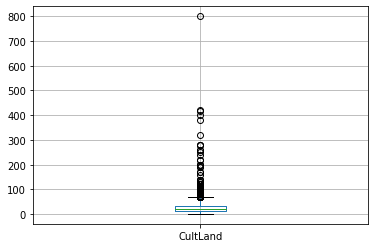

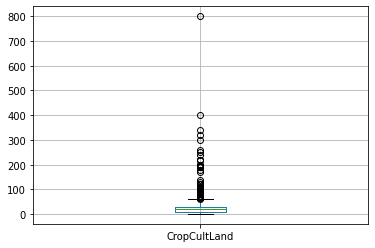

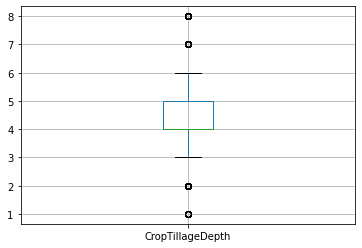

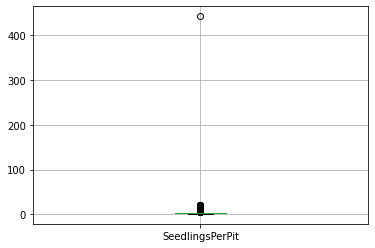

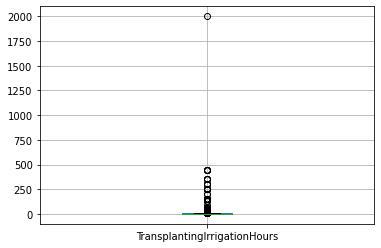

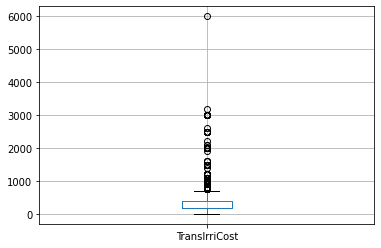

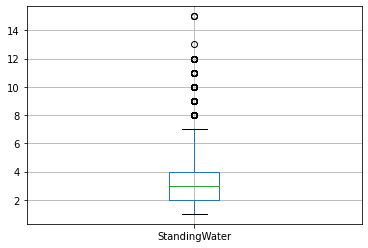

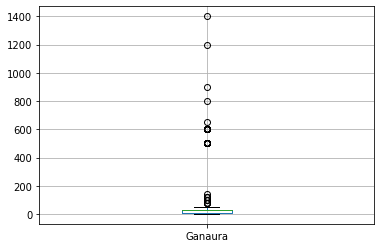

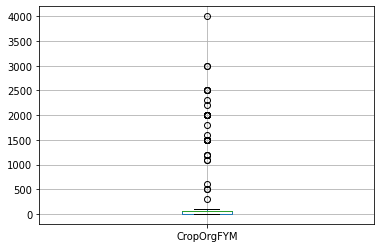

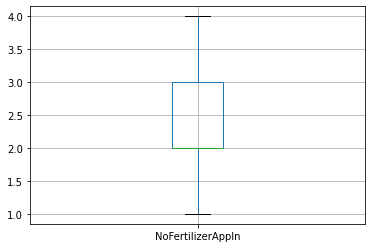

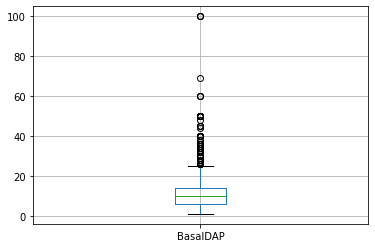

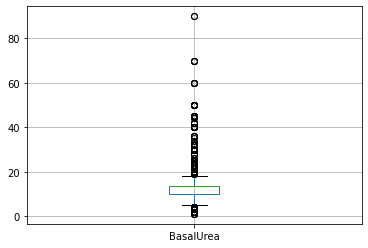

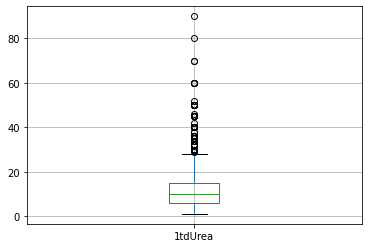

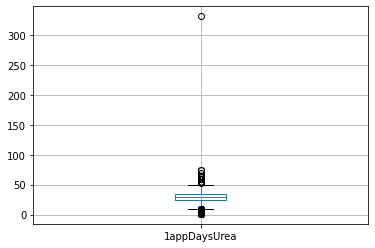

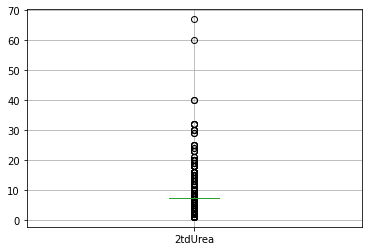

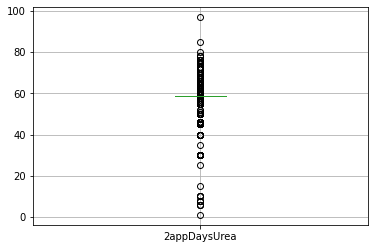

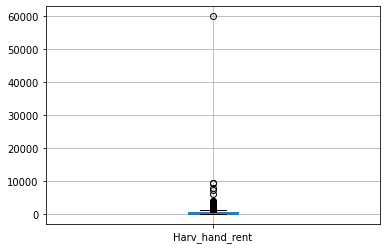

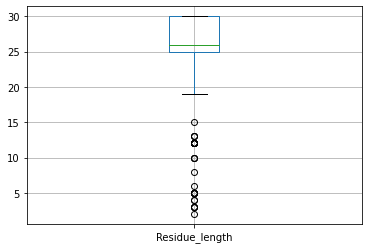

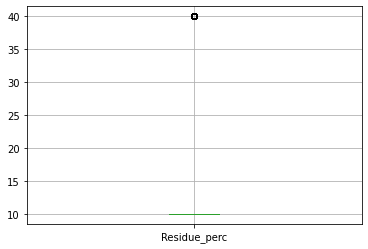

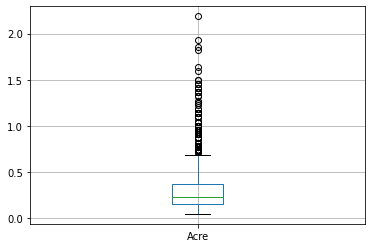

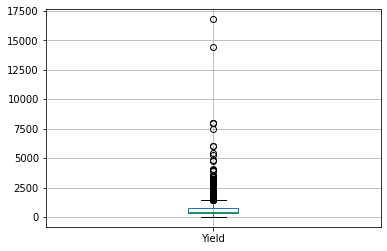

In [12]:
# Using the Inter Quartile Range (IQR) technique to determine clamping points for outlier detection
def get_q1(feat_values):
    return feat_values.quantile(0.25)

def get_q3(feat_values):
    return feat_values.quantile(0.75)

def get_iqr(feat_values):
    return feat_values.quantile(0.75) - feat_values.quantile(0.25)


def get_iqr_upper(feat_values):
    return feat_values.quantile(0.75) + 1.5*(feat_values.quantile(0.75) - feat_values.quantile(0.25))

def get_iqr_lower(feat_values):
    return feat_values.quantile(0.25) - 1.5*(feat_values.quantile(0.75) - feat_values.quantile(0.25))

def get_iqr_outliers(feat_values):
    return (feat_values < get_iqr_lower(feat_values)) | (feat_values > get_iqr_upper(feat_values))


for col in con_features:
    print(col)
    print( "Upper Bound:", get_iqr_upper (train_data[col]) )
    print( "Lower Bound:", get_iqr_lower (train_data[col]) )
    print( "number of outliers:", len(train_data.loc[get_iqr_outliers(train_data[col]), [col]]) )
    plt.figure()   # plots figure for each iteration
    train_data[[col]].boxplot()

#### 6. Encode Categorical Features

In [13]:
from scipy import stats
from sklearn.preprocessing import LabelEncoder

def encode_categorical_features(features, data):

    categorical_encodings = {}
    
    for feature in features:

        
        # Create a Label Encoder for feature
        le = LabelEncoder()

        # Ensure the column is treated as string
        data[feature] = data[feature].astype(str) 
         
        # Encode feature
        data[feature] = le.fit_transform(data[feature])
        categorical_encodings[feature] = dict(zip(le.classes_, le.transform(le.classes_)))

        # display categorical encoding details
        print(f"*** Feature: {feature} ***")
        for k, v in zip(le.classes_, le.transform(le.classes_)):
            print(k, v, sep="-->")

    return data

In [14]:
data = encode_categorical_features(cat_features, train_data)

*** Feature: ID ***
ID_001QL5V4IJIB-->0
ID_0052WYM5HMU9-->1
ID_009LPKPHNPAM-->2
ID_00EY6CRIUKNC-->3
ID_00Y3326FJGMI-->4
ID_0146EAXYWN0S-->5
ID_01I7S9Q4MNVN-->6
ID_02PGH966G209-->7
ID_02T0FLK3N40W-->8
ID_032A1IRQR4JL-->9
ID_03BKIGNKUTTG-->10
ID_03GY60TT7SA4-->11
ID_03SK45K7D7RJ-->12
ID_040Z10BUDX5A-->13
ID_0411WHXK11EA-->14
ID_047I0712DSYT-->15
ID_04AHJDK3RX9A-->16
ID_04IS9VSQZREC-->17
ID_04KD58L5XOFY-->18
ID_04L7RSU2U3WM-->19
ID_04PEKQ4E6QQC-->20
ID_054VH7N04A8B-->21
ID_058QFNE7KLRI-->22
ID_05GY06F13PQ4-->23
ID_05LJ8YMX1TWL-->24
ID_0630PTEWRS94-->25
ID_06HSCG5S828X-->26
ID_06NBE2I4ERSS-->27
ID_07TV7F6HT8GL-->28
ID_080FVVEW058M-->29
ID_08BSUXO0S977-->30
ID_08CRED9GFPRX-->31
ID_08KD918FIS2Y-->32
ID_092YO1TDKH21-->33
ID_093J455RHBQI-->34
ID_09UZSYU00W9C-->35
ID_09XSFI4DVG0U-->36
ID_0A7MWH8O97GP-->37
ID_0ABIYRJTKMY4-->38
ID_0ALGWLTKT4NU-->39
ID_0AWBEIMCU0MG-->40
ID_0B39D696JLBJ-->41
ID_0B4BASQWNFL7-->42
ID_0B4G1JFBXNNA-->43
ID_0BZGQRTLP0DI-->44
ID_0BZM6A6ZJX4X-->45
ID_0C7QDPBNMPDM-->46
ID_

#### Store Processed Dataset

In [15]:
# save processed train_data as a csv file
train_data.to_csv('Processed_Train.csv', index=None)

####7. Plot Correlation Matrix for Categorical and Continuous Features

In [16]:
import seaborn as sns

# Correlation Matrix for Categorical Features
cat_corr_matrix = train_data[cat_features].corr()
plt.figure(figsize=(25, 25))
sns.heatmap(cat_corr_matrix, annot=True)
plt.show()

# Correlation Matrix for Continuous Features
con_corr_matrix = train_data[con_features].corr()
plt.figure(figsize=(25, 25))
sns.heatmap(con_corr_matrix, annot=True)
plt.show()

ModuleNotFoundError: No module named 'seaborn'

#### 8. Histograms & Bar charts

In [ ]:
# Plot histograms for continuous features
for feature in con_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_data[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

NameError: name 'sns' is not defined

<Figure size 576x432 with 0 Axes>

In [ ]:
# Plot bar charts for categorical features
for feature in cat_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(train_data=data, x=feature)
    plt.title(f'Bar Chart of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

NameError: name 'sns' is not defined

<Figure size 576x432 with 0 Axes>